In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/개발_전처리/소프트웨어개발.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,클라우드 모니터링 솔루션 개발 데이터 수집 pipeline 개발,Java 11 버전 이상 개발 경험이 있으신 분 SpringBoot를 이용한...
1,전사적으로 발생하는 다양한 문제들을 데이터를 기반으로 해결 방법을 찾고 결과를 동...,데이터 분석 및 모델링 경력 2년 이상 또는 그에 준하는 역량을 보유하신 분 대표...
2,ESSEnergy Storage System의 주요 Software 개발 배터리 ...,정보통신컴퓨터소프트웨어 등 관련 분야 학사 이상 프로그래밍 관련 경력 2년 이상 ...
3,VitalCare의 벡엔드 시스템 설계 및 개발 Python Golang을 이용한...,Python 또는 Golang을 활용한 백엔드 개발 경험이 5년 이상 또는 그에 ...
4,제일제당 CRM 플랫폼 개발운영Data Engineer 데이터 분석 파이프라인 개...,Experience 데이터 파이프라인 구축 경험 프로세스 제안 개선문제점 분석 및 ...
...,...,...
644,IP and SoC Design Verification AI 하드웨어 프로세서 설...,System Verilog UVM C 를 이용한 IP 및 SoC Full chip...
645,1 금속 3D 프린터 OS 개발2 Depower 설비 등의 지원설비에 대한 OS 개...,학력 초대졸이상경력 경력5년우대사항병역특례영어가능자관련 석사학위 수여자3D 프린...
646,우분투1804리눅스 기반 차량용 녹화프로그램 개발 AWS S3 데이터 업로드 ...,임베디드 리눅스 개발 경력 5년 이상 CC 프로그래밍 가능자 오픈소스 포팅 유경험...
647,DC 전기차 충전기 펌웨어 개발 및 유지 보수전기차 충전 제어 담당충전기 내부 시스...,C언어 사용 가능자MCU 주변 회로 분석 가능자끈기 인내심 도전 정신 본인이 하는 ...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,Java 11 버전 이상 개발 경험이 있으신 분 SpringBoot를 이용한...
1,데이터 분석 및 모델링 경력 2년 이상 또는 그에 준하는 역량을 보유하신 분 대표...
2,정보통신컴퓨터소프트웨어 등 관련 분야 학사 이상 프로그래밍 관련 경력 2년 이상 ...
3,Python 또는 Golang을 활용한 백엔드 개발 경험이 5년 이상 또는 그에 ...
4,Experience 데이터 파이프라인 구축 경험 프로세스 제안 개선문제점 분석 및 ...
...,...
644,System Verilog UVM C 를 이용한 IP 및 SoC Full chip...
645,학력 초대졸이상경력 경력5년우대사항병역특례영어가능자관련 석사학위 수여자3D 프린...
646,임베디드 리눅스 개발 경력 5년 이상 CC 프로그래밍 가능자 오픈소스 포팅 유경험...
647,C언어 사용 가능자MCU 주변 회로 분석 가능자끈기 인내심 도전 정신 본인이 하는 ...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/개발_전처리/소프트웨어개발(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n  Java 11 버전 이상 개발 경험이 있으신 분   SpringBoot를 이용한 Web Application 개발 경험이 있으신 분   JPA MyBatis 사용 경험이 있으신 분   RDBMSMySQL PostgresSQL 경험이 있으신 분   ElasticSearch Logstash 사용 경험이 있으신 분   Big data 처리 경험이 있으신 분  데몬 배치 개발 경험이 있으신 분   AWS GCP 등 public cloud 환경 경험이 있으신 분   프로젝트 리딩 또는 관리 경험이 있으신 분   비즈니스 로직에 대한 이해를 바탕으로 API와 데이터 모델을 설계할 수 있으신 분   코드리뷰에 거부감이 없으신 분   자신이 경험한 프로젝트에 대해 구체적이고 명료한 설명을 할 수 있으신 분   주도적으로 문제를 찾고 해결할 수 있으신 분   모니터링 프로세스 및 솔루션 개발 경험이 있으신 분   협업툴 사용 경험Jira Git Confluence이 있으신 분 \n 데이터 분석 및 모델링 경력 2년 이상 또는 그에 준하는 역량을 보유하신 분 대표적인 MLDL 모델을 이해하고 특징 및 차이에 대해 이해하고 계신 분 Python SQL R 등의 프로그래밍 언어로 개발이 가능하신 분 문제를 해결하기 위해 스스로 필요한 데이터를 정의 확보 및 분석할 수 있는 분 명확한 문제정의를 바탕으로 해결 방법을 고안하고 분석한 결과를 효과적인 커뮤니케이션 스킬을 통해 전달 할 수 있는 분 내가 제안한 설계와 개발한 코드에 대한 비판에도 열린 커뮤니케이션이 가능한 분 헬스케어 관련 데이터에 대한 경험이해가 있는 분 MLOps를 이용하여 실제 서비스를 운영 해본 경험이 있으신 분 주도적으로 문제를 해결하고 개선하고자 하는 의지를 가진 분 헬스케어 도메인에서 무언가를 이뤄보고 싶으신 분\n 정보통신컴퓨터소프트웨어 등 관련 분야 학사 이상 프로그래밍 관련 경력 2년 이상  CC 프로그래밍 언어의 숙련된 활용 능력 네트워크 프로그래밍 숙련자 데이터베이스MyS

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '버전',
 '이상',
 '개발',
 '경험',
 '분',
 '를',
 '이용',
 '개발',
 '경험',
 '분',
 '사용',
 '경험',
 '분',
 '경험',
 '분',
 '사용',
 '경험',
 '분',
 '처리',
 '경험',
 '분',
 '데몬',
 '배치',
 '개발',
 '경험',
 '분',
 '등',
 '환경',
 '경험',
 '분',
 '프로젝트',
 '리딩',
 '관리',
 '경험',
 '분',
 '비즈니스',
 '로직',
 '대한',
 '이해',
 '바탕',
 '데이터',
 '모델',
 '설계',
 '수',
 '분',
 '코드',
 '리뷰',
 '거부',
 '감',
 '분',
 '자신',
 '경험',
 '프로젝트',
 '대해',
 '구체',
 '설명',
 '수',
 '분',
 '주도',
 '문제',
 '해결',
 '수',
 '분',
 '모니터링',
 '프로세스',
 '및',
 '솔루션',
 '개발',
 '경험',
 '분',
 '협업',
 '툴',
 '사용',
 '경험',
 '이',
 '분',
 '데이터',
 '분석',
 '및',
 '모델링',
 '경력',
 '이상',
 '그',
 '준',
 '역량',
 '보유',
 '분',
 '대표',
 '모델',
 '이해',
 '특징',
 '및',
 '차이',
 '대해',
 '이해',
 '분',
 '등',
 '프로그래밍',
 '언어',
 '개발',
 '분',
 '문제',
 '해결',
 '위해',
 '스스로',
 '데이터',
 '정의',
 '확보',
 '및',
 '분석',
 '수',
 '분',
 '정의',
 '바탕',
 '해결',
 '방법',
 '고안',
 '분석',
 '결과',
 '효과',
 '커뮤니케이션',
 '스킬',
 '통해',
 '전달',
 '수',
 '분',
 '내',
 '제안',
 '설계',
 '개발',
 '코드',
 '대한',
 '비판',
 '커뮤니케이션',
 '분',
 '헬',
 '스케',
 '관련',
 '데이터',
 '대한'

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

31703
1532


FreqDist({'경험': 2616, '분': 2324, '개발': 1774, '및': 986, '대한': 658, '경력': 633, '이상': 602, '등': 585, '이해': 520, '관련': 426, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [11]:
stop_words = [
   '문제', '환경','기술','지식','개발','사용','이해','기반','필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '버전',
 '를',
 '이용',
 '처리',
 '데몬',
 '배치',
 '프로젝트',
 '리딩',
 '관리',
 '비즈니스',
 '로직',
 '바탕',
 '데이터',
 '모델',
 '설계',
 '코드',
 '리뷰',
 '거부',
 '감',
 '자신',
 '프로젝트',
 '대해',
 '구체',
 '설명',
 '주도',
 '모니터링',
 '프로세스',
 '솔루션',
 '협업',
 '툴',
 '이',
 '데이터',
 '분석',
 '모델링',
 '그',
 '준',
 '역량',
 '대표',
 '모델',
 '특징',
 '차이',
 '대해',
 '프로그래밍',
 '언어',
 '위해',
 '스스로',
 '데이터',
 '정의',
 '확보',
 '분석',
 '정의',
 '바탕',
 '방법',
 '고안',
 '분석',
 '결과',
 '효과',
 '커뮤니케이션',
 '스킬',
 '통해',
 '전달',
 '설계',
 '코드',
 '비판',
 '커뮤니케이션',
 '헬',
 '스케',
 '데이터',
 '를',
 '이용',
 '실제',
 '서비스',
 '운영',
 '주도',
 '개선',
 '의지',
 '헬',
 '스케',
 '도메인',
 '무언가',
 '보고',
 '정보통',
 '컴퓨터',
 '소프트웨어',
 '분야',
 '학사',
 '프로그래밍',
 '프로그래밍',
 '언어',
 '숙련',
 '네트워크',
 '프로그래밍',
 '숙련',
 '데이터베이스',
 '연동',
 '전력',
 '계통',
 '인터프리터',
 '언어',
 '숙련',
 '시스템',
 '외국어',
 '영어',
 '백엔드',
 '그',
 '준',
 '그',
 '준',
 '프레임워크',
 '를',
 '데이터베이스',
 '설계',
 '구현',
 '중요도',
 '테스트',
 '코드',
 '작성',
 '백엔드',
 '아키텍처',
 '설계',
 '최적화',
 '통한',
 '이미지',
 '통한',
 '의료',
 '데이터',
 '처리',
 '의료',
 '테스트',
 '코드',
 '작성',
 '테

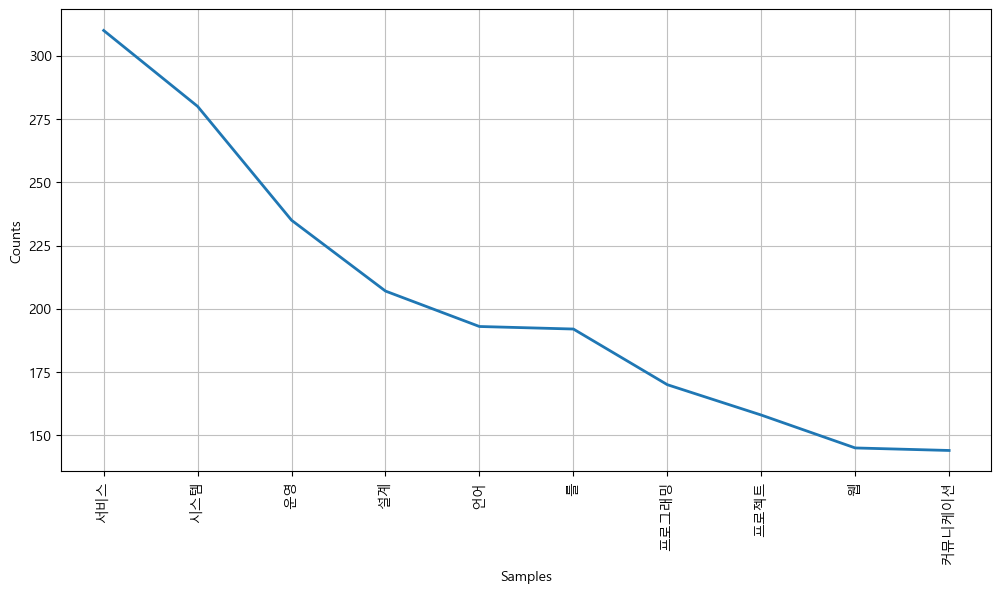

In [12]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

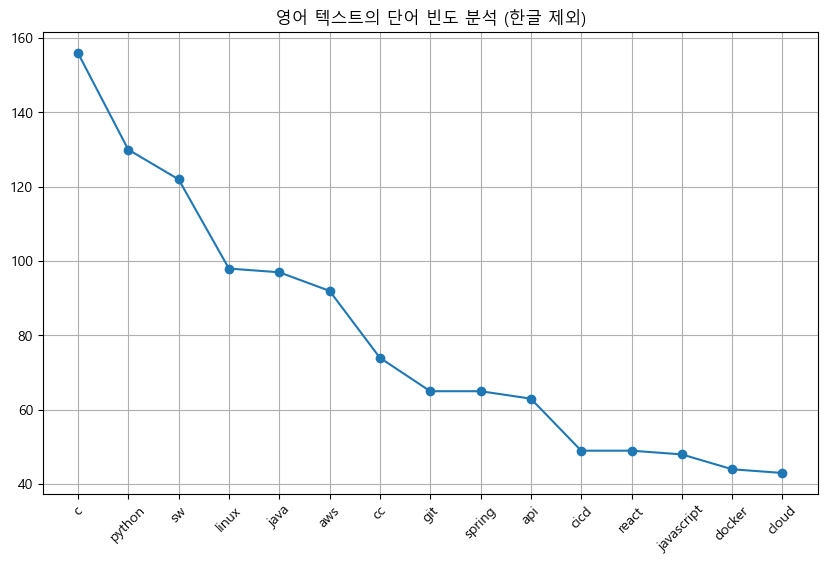

In [16]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)